In [1]:
import pandas as pd
from pandas_datareader import data
import itertools
import numpy as np
import matplotlib.pyplot as plt 

from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data.csv


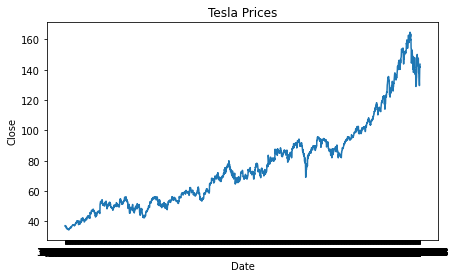

In [12]:
df = pd.read_csv("Stock Price Data.csv")
plt.figure(figsize=(7,4))
plt.title('Tesla Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df["Date"], df["Close"])

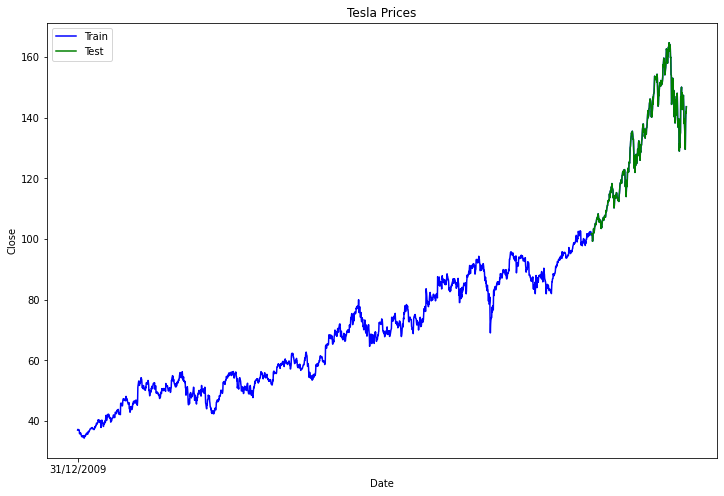

In [13]:
train_data, test_data = df[0:int(len(df)*382/453)], df[int(len(df)*382/453):]
plt.figure(figsize=(12,8))
plt.title('Tesla Prices')

plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'], 'blue', label='Train')
plt.plot(test_data['Close'], 'green', label='Test')
plt.xticks(np.arange(0, 1, 250), df['Date'][0:250:1])
plt.legend()

In [14]:
def smape(y_true, y_pred):
  return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [15]:
#Arima model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 4.862
Symmetric mean absolute percentage error: 15.723


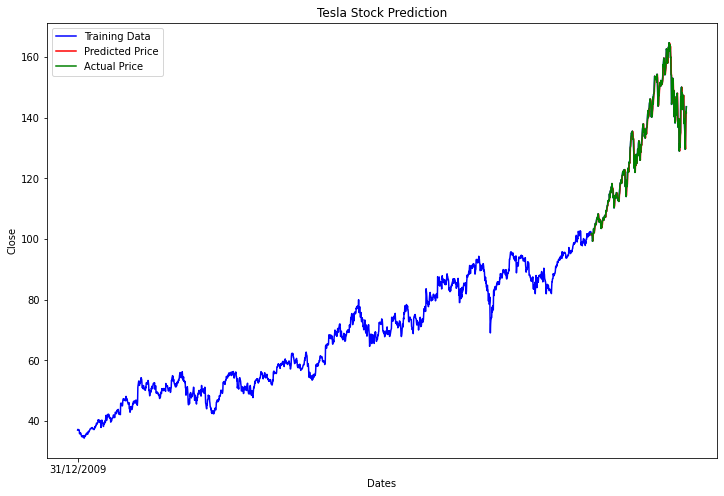

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='green', label='Actual Price')
plt.title('Tesla Stock Prediction')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.xticks(np.arange(0,1, 250), df['Date'][0:250:1])
plt.legend()

In [17]:
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('Sample Submission.csv')


Saving Sample Submission.csv to Sample Submission (1).csv


In [21]:
df1['Close'] = np.array(predictions)
df1.to_csv('Arima 2.csv', index=False)